In [3]:
#나눔폰트 다운로드 (실행 후 런타임 다시시작)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,165 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

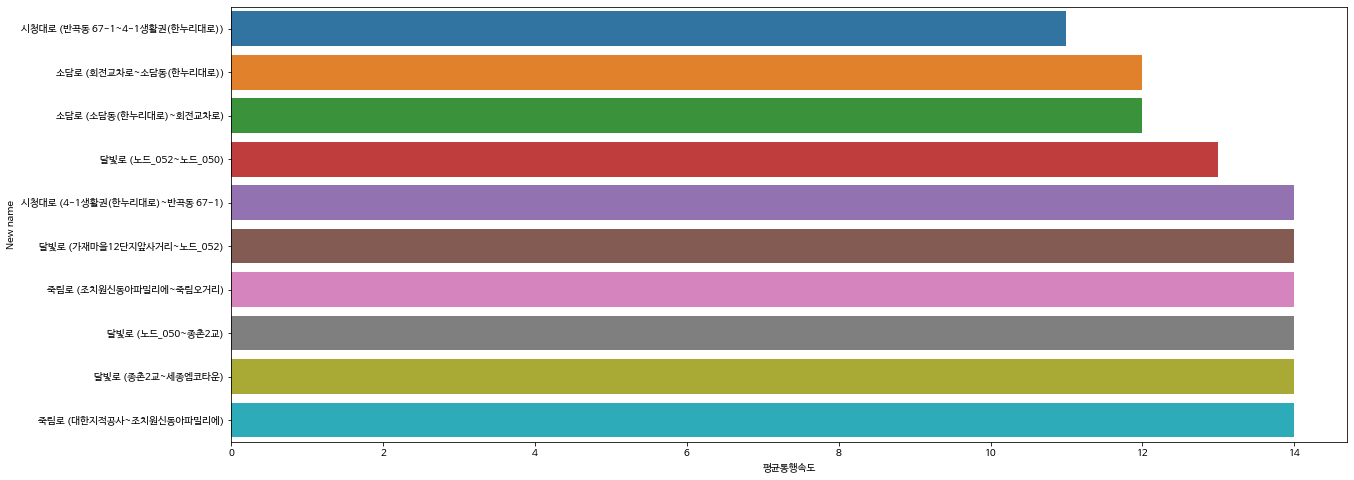

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

#상습정체시간별 도로 속도 데이터
df_or=pd.read_excel("/data/상습정체시간(도로)_셀맵 (1).xls")

#데이터 전처리(출퇴근시간 평균속도)
df_V_k=df_or.replace('-',0)
df_V_k['New name']=df_V_k['도로명']+' '+'('+df_V_k['도로']+')'
df_V=df_V_k[['New name','07','08','09','17','18','19']]
df_V=df_V.replace(0,np.NaN)
df_V.isnull().sum()
df_V_means=df_V.mean(skipna=True,axis=1)
df_V_means=df_V_means.astype(int)
df_V['평균통행속도']=df_V_means
df=df_V.sort_values('평균통행속도',ascending=True)
df10=df.head(10)

#seaborn bar graph
plt.figure(figsize=(20,8))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(data=df10,x='평균통행속도',y='New name')
plt.show()

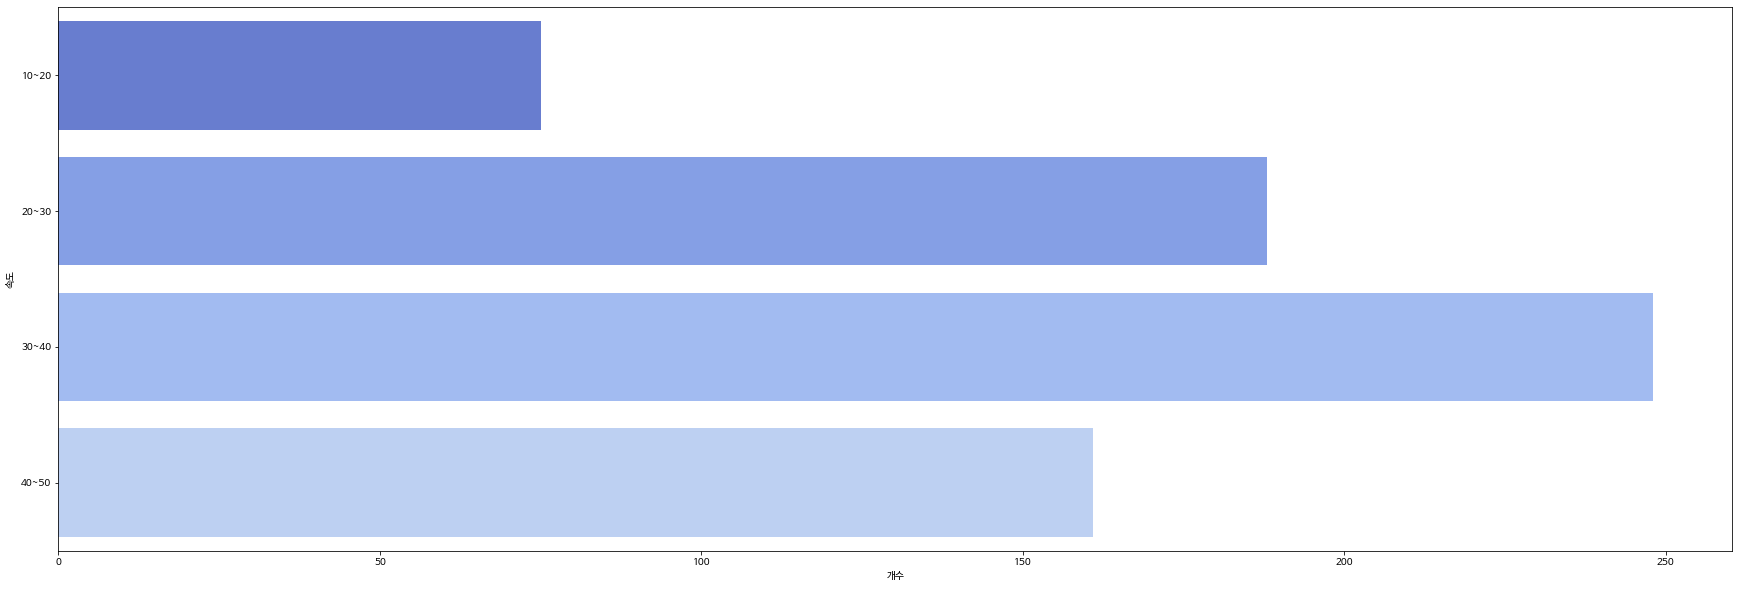

In [3]:
# pandas 표 제한 해제
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

#속도별 도로
df_10_20 = df[df['평균통행속도']<20]
df_20_30 = df[(df['평균통행속도']>=20) & (df['평균통행속도']<30)]
df_30_40 = df[(df['평균통행속도']>=30) & (df['평균통행속도']<40)]
df_40_50 = df[(df['평균통행속도']>=40) & (df['평균통행속도']<50)]

data ={
    '속도':['10~20','20~30','30~40','40~50'],
    '개수':[len(df_10_20),len(df_20_30),len(df_30_40),len(df_40_50)]
}

# 그래프 조정
plt3=sns.color_palette('coolwarm',10)
df_summary=pd.DataFrame(data)
plt.figure(figsize=(30, 10))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(data=df_summary,x='개수',y='속도',ci=None,palette=plt3)
plt.show()